# 01 - Explore

# 1. Ambient Preparation

In [7]:
from IPython.display import display, HTML

display(HTML("<style>.container {widht: 100% !important;}</style>"))

## 1.1. Import packages

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path
import random
import kagglehub
import os

import torch

In [9]:
if torch.cuda.is_available():
    print("__CUDNN VERSION:", torch.backends.cudnn.version())
    print("Device Name:", torch.cuda.get_device_name(0))
    device = 'cuda'
else:
    print("CUDA is not available.")
    device = 'cpu'

print('Device:', device)

__CUDNN VERSION: 91501
Device Name: NVIDIA GeForce RTX 5070
Device: cuda


# 2. Data

In [10]:
download_data = False

if download_data:
    path = kagglehub.dataset_download("kmader/skin-cancer-mnist-ham10000")

    DEST = Path("../data/raw")
    DEST.mkdir(parents=True, exist_ok=True)

    os.system(f"ln -s {path}/* {DEST}")


In [11]:
data_dir = Path("../data/raw")
csv_path = data_dir/ "HAM10000_metadata.csv"

df = pd.read_csv(csv_path)
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [12]:
img_data1 = data_dir / "HAM10000_images_part_1"
img_data2 = data_dir / "HAM10000_images_part_2"

print(csv_path.exists())
print(img_data1.exists(), img_data2.exists())
print(len(df))

True
True True
10015


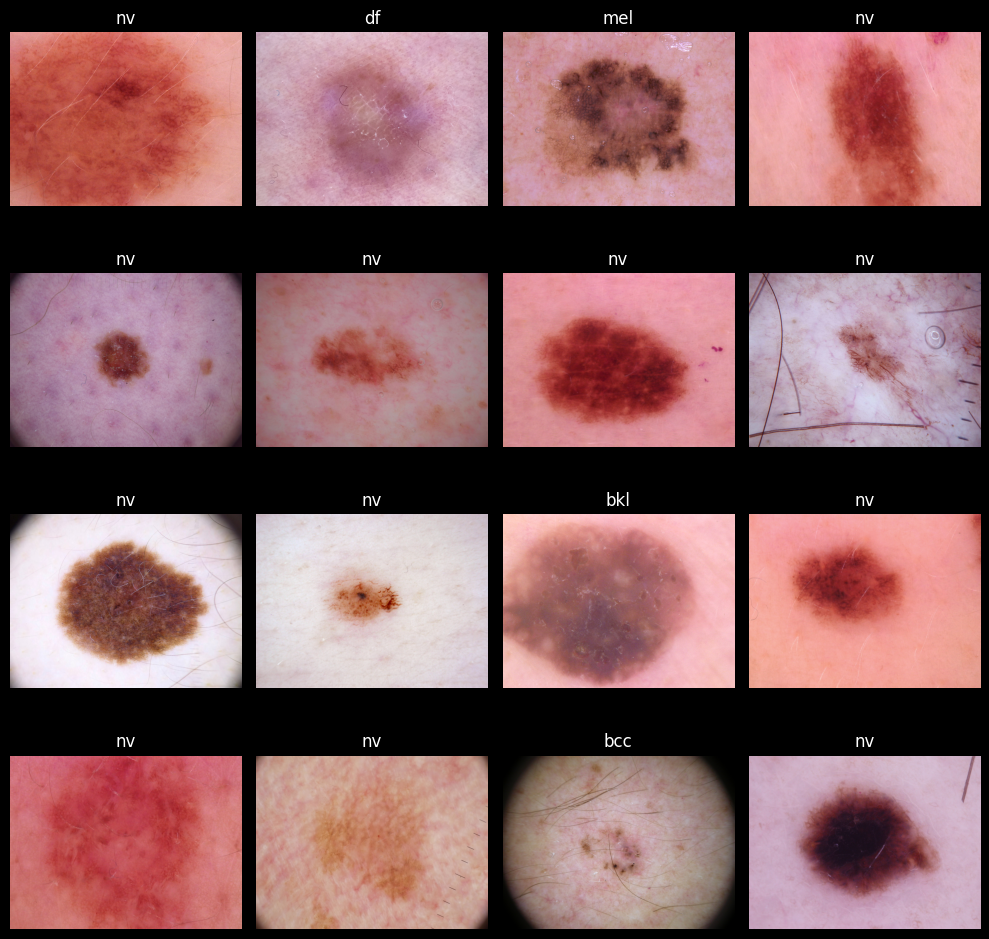

In [13]:
def load_img(name):
    p1 = img_data1 / f"{name}.jpg"
    p2 = img_data2 / f"{name}.jpg"
    return p1 if p1.exists() else p2

fig, axes = plt.subplots(4,4, figsize=(10,10))
for ax in axes.flatten():
    row = df.sample(1).iloc[0]
    img = Image.open(load_img(row['image_id']))
    ax.imshow(img)
    ax.set_title(row['dx'])
    ax.axis("off")

plt.tight_layout()
plt.show()

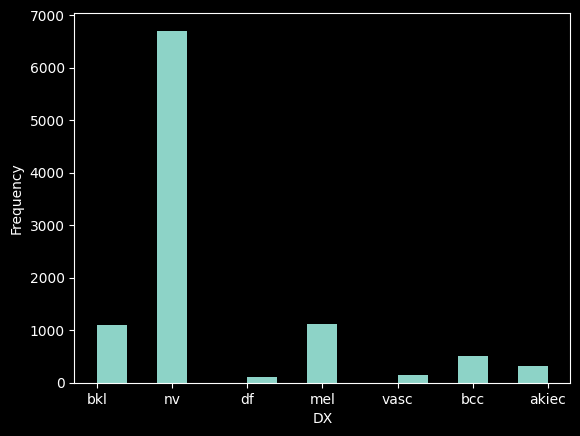

In [17]:
plt.hist(df["dx"], bins=15)
plt.xlabel("DX")
plt.ylabel("Frequency")
plt.show()

In [18]:
df.isna().sum().sort_values(ascending=False)

age             57
image_id         0
lesion_id        0
dx               0
dx_type          0
sex              0
localization     0
dtype: int64